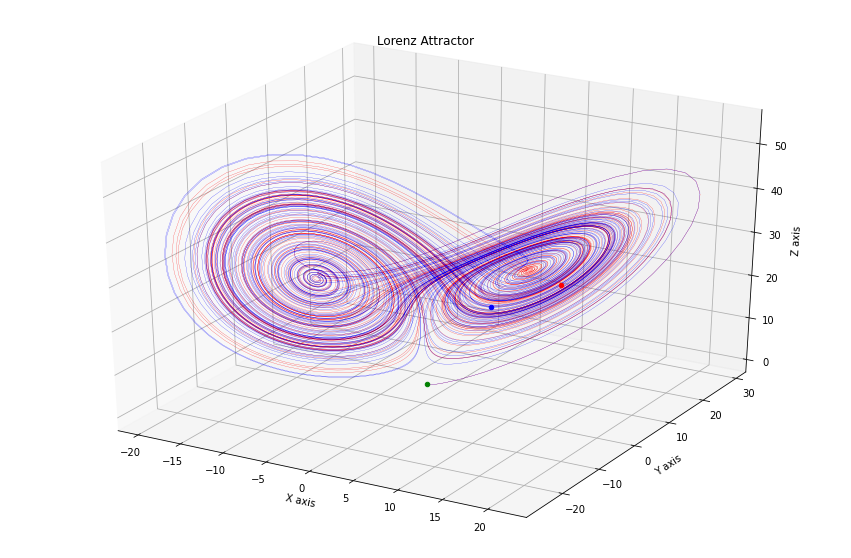

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y -b*z
    return x_dot, y_dot, z_dot

dt = 0.01
num_steps = 10000

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)
us = np.empty(num_steps + 1)
vs = np.empty(num_steps + 1)
ws = np.empty(num_steps + 1)
    
xs[0] = 0.0
ys[0] = 1.0
zs[0] = 1.05
us[0] = 0.01
vs[0] = 1.0
ws[0] = 1.05

for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i+1] = xs[i] + (dt * x_dot)
    ys[i+1] = ys[i] + (dt * y_dot)
    zs[i+1] = zs[i] + (dt * z_dot)
    
for i in range(num_steps):
    u_dot, v_dot, w_dot = lorenz(us[i], vs[i], ws[i])
    us[i+1] = us[i] + (dt * u_dot)
    vs[i+1] = vs[i] + (dt * v_dot)
    ws[i+1] = ws[i] + (dt * w_dot)    
    
    
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection = '3d')
ax.plot(xs, ys, zs, lw=0.2, color = 'red')
ax.scatter(xs[-1], ys[-1], zs[-1], color = 'red')
ax.plot(us, vs, ws, lw=0.2, color = 'blue')
ax.scatter(us[-1], vs[-1], ws[-1], color = 'blue')
ax.scatter(xs[1], ys[1], zs[1], color = 'green')
ax.set_xlabel('X axis')  
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Lorenz Attractor')

plt.show()

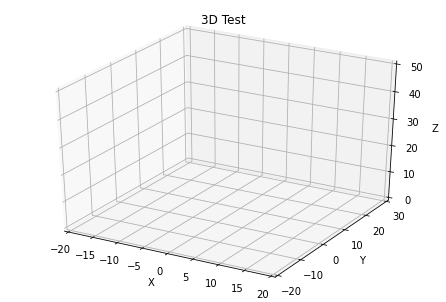

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.display import HTML
# Fixing random state for reproducibility
np.random.seed(19680801)

def dinamica():
    """
    lineData è l'array 3d che vuoi animare
    """
    def lorenz(x, y, z, s=10, r=28, b=2.667):
        x_dot = s*(y - x)
        y_dot = r*x - y - x*z
        z_dot = x*y -b*z
        return x_dot, y_dot, z_dot

    dt = 0.01
    num_steps = 10000

    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    us = np.empty(num_steps + 1)
    vs = np.empty(num_steps + 1)
    ws = np.empty(num_steps + 1)
    
    xs[0] = 0.0
    ys[0] = 1.0
    zs[0] = 1.05
    us[0] = 0.01
    vs[0] = 1.0
    ws[0] = 1.05

    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i+1] = xs[i] + (dt * x_dot)
        ys[i+1] = ys[i] + (dt * y_dot)
        zs[i+1] = zs[i] + (dt * z_dot)
    
    for i in range(num_steps):
        u_dot, v_dot, w_dot = lorenz(us[i], vs[i], ws[i])
        us[i+1] = us[i] + (dt * u_dot)
        vs[i+1] = vs[i] + (dt * v_dot)
        ws[i+1] = ws[i] + (dt * w_dot)
        
    lineData = np.empty((3,num_steps + 1))
    lineData[0,:] = us[:]
    lineData[1,:] = vs[:]
    lineData[2,:] = ws[:]
    return lineData

def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
"""
Per prima cosa crea l'array che andrai a visualizzare: data
"""
data = [dinamica() for index in range(1)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([-20.0, 20.0])
ax.set_xlabel('X')

ax.set_ylim3d([-20, 30])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 50.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, frames=np.arange(1,5000,1), fargs=(data, lines),interval=10, blit=False)

plt.show()
HTML(line_ani.to_html5_video())

array([[4.64685844e-310, 4.64685847e-310],
       [6.93423290e-310, 2.77398666e+087],
       [6.93423290e-310, 6.93423290e-310],
       [8.03813277e-187, 6.93423290e-310]])